<a href="https://colab.research.google.com/github/spadao/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks with TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)


2.5.0


## Creating data to view and fit

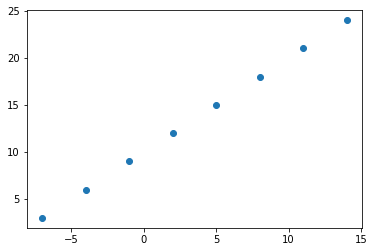

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#Visualize it

plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modellig with TF

1. Create a model - define input and output layers and hidden layers
2. Compile model - loss func, optimizer and evaluation metrics
3. Fitting a model - Let the model try to identify the patterns

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model

model.compile(loss= tf.keras.losses.mae #Mean absolute error
,optimizer = tf.keras.optimizers.SGD() # Stochastic gradient descent
, metrics=['mae']
)

# 3. Fit the model

model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 621ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [8]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
# Try to predict with the trained model

y_pred = model.predict([17.0]) #Expected 27
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model

1. Creating a model - add more layers, increase number of neurons, change activation functions
2. Compiling a model - change the optimization functions or the learning rate of the optimization function
3. Fitting a model - more epochs or give more data

In [10]:
# Rebuilding our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,optimizer = tf.optimizers.SGD(), metrics=['MAE'])

#3. Fit the model

model.fit(X,y,epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 221ms/step - loss: 11.2219 - MAE: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0894 - MAE: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - MAE: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - MAE: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - MAE: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - MAE: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4269 - MAE: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2944 - MAE: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1619 - MAE: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - MAE: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 2m

In [11]:
# Reminding the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
#Check if the prediction has improved

model.predict([17.0])# Expected 27 


array([[29.739855]], dtype=float32)

In [13]:
# Rebuilding our model with further changes

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,optimizer = tf.optimizers.SGD(), metrics=['MAE'])

#3. Fit the model

model.fit(X,y,epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 166ms/step - loss: 12.3193 - MAE: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7804 - MAE: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2324 - MAE: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6601 - MAE: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0632 - MAE: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4503 - MAE: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7991 - MAE: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.1072 - MAE: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.3691 - MAE: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.5758 - MAE: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - l

In [14]:
# Testing a new prediction

model.predict([17.0]) # Expected 27
#Signs of overfitting --> Better loss but worse performance with outside data

array([[31.22314]], dtype=float32)

## Evaluating a model

Typical workflow when working with neural networks

Build -> fit -> evaluate -> tweak -> fit -> evaluate -> tweak ->...

When evaluating remeber:
> Visualize,Visualize,Visualize
* The data
* The model
* The training
* The predictions

In [15]:
# Make a bigger dataset

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [16]:
#Make labels for the dataset

y= X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

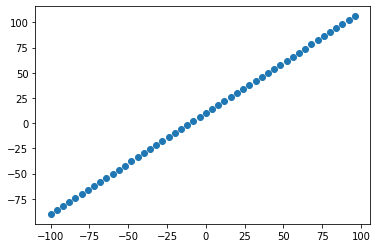

In [17]:
# Visualize the data
plt.scatter(X,y)

### The 3 sets...

* Training (70-80%) 
* Validate - used for tunning/tweaking (10-15%)
* Test - Evaluation/final testing (10-15%)

In [18]:
# Check the lenght of the samples

len(X)

50

In [19]:
#Because of the diminished value of samples validation set is going to be ignored for now
#Split the data into train and test

X_train = X[:40]#First 40 (80%)
X_test = X[40:]# Last 10 (20%)
y_train = y[:40]
y_test = y[40:]

len(X_test),len(y_test),len(X_train),len(y_train)

(10, 10, 40, 40)

## Visualizing the data after split

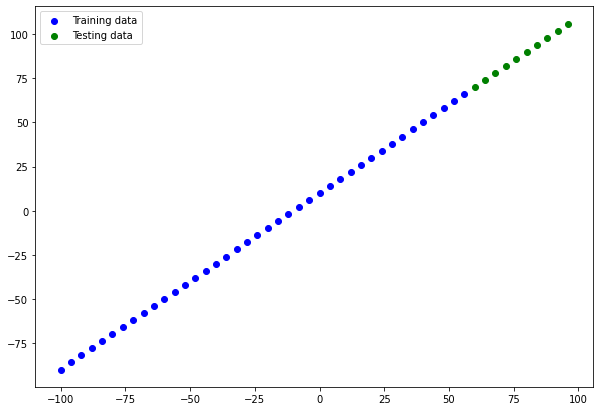

In [20]:
plt.figure(figsize=(10,7))
#Plot training in blue
plt.scatter(X_train,y_train,c='b',label = 'Training data')
plt.scatter(X_test,y_test,c='g',label = 'Testing data')
plt.legend()

In [21]:
#Building a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
optimizer=tf.keras.optimizers.SGD(),
metrics=['mae'])

#model.fit(X_train,y_train,epochs=100)

In [22]:
X[0].shape

TensorShape([])

In [23]:
# Creating a model that builds automatically by defining the input_shape on the first layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])

model.compile(loss = tf.keras.losses.mae,
optimizer=tf.keras.optimizers.SGD(),
metrics=['mae'])

#model.fit(X_train,y_train,epochs=100)

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Every time we run fit without reinstatiate the model it adds epochs to the training
#Watch out with this to not cause overfitting
model.fit(X_train,y_train,epochs=100,verbose = 0) 

* Total params - number of parameters in the model
* Trainable params - parameters that the model can update as it trains
* Non-trainable params - frozen parameters trained previously (imported models generally)

In [42]:
from keras.utils.vis_utils import plot_model

plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Visualizing the model predictions 